# 1. Loading & Understanding data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv(r'C:\Users\kami.cheung\blackfri\train.csv')
test = pd.read_csv(r'C:\Users\kami.cheung\blackfri\test.csv')

In [3]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train_data.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


Understanding the summary statistics of all variables in the data set

1. Most of the variables like occupation, Product categories in the dataset are masked with integers and City_Category is masked with alphabets
2. Product P00265242 is the most popular product! with 1880 occurences.
3. Male buyers are more frequent in the dataset than female buyers.
4. Age group with most transactions was 26-35.
5. Occupation '4' had the most transactions.
6. City Category with most transactions was B.
7. Highest number of purchasers had '1 year stay' in the current city.
8. Data set has more singles (Marital status 0) than married people (Marital status 1).

In [6]:
train_data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [7]:
train_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# 2. Data visualisation & Gathering insights (EDA)

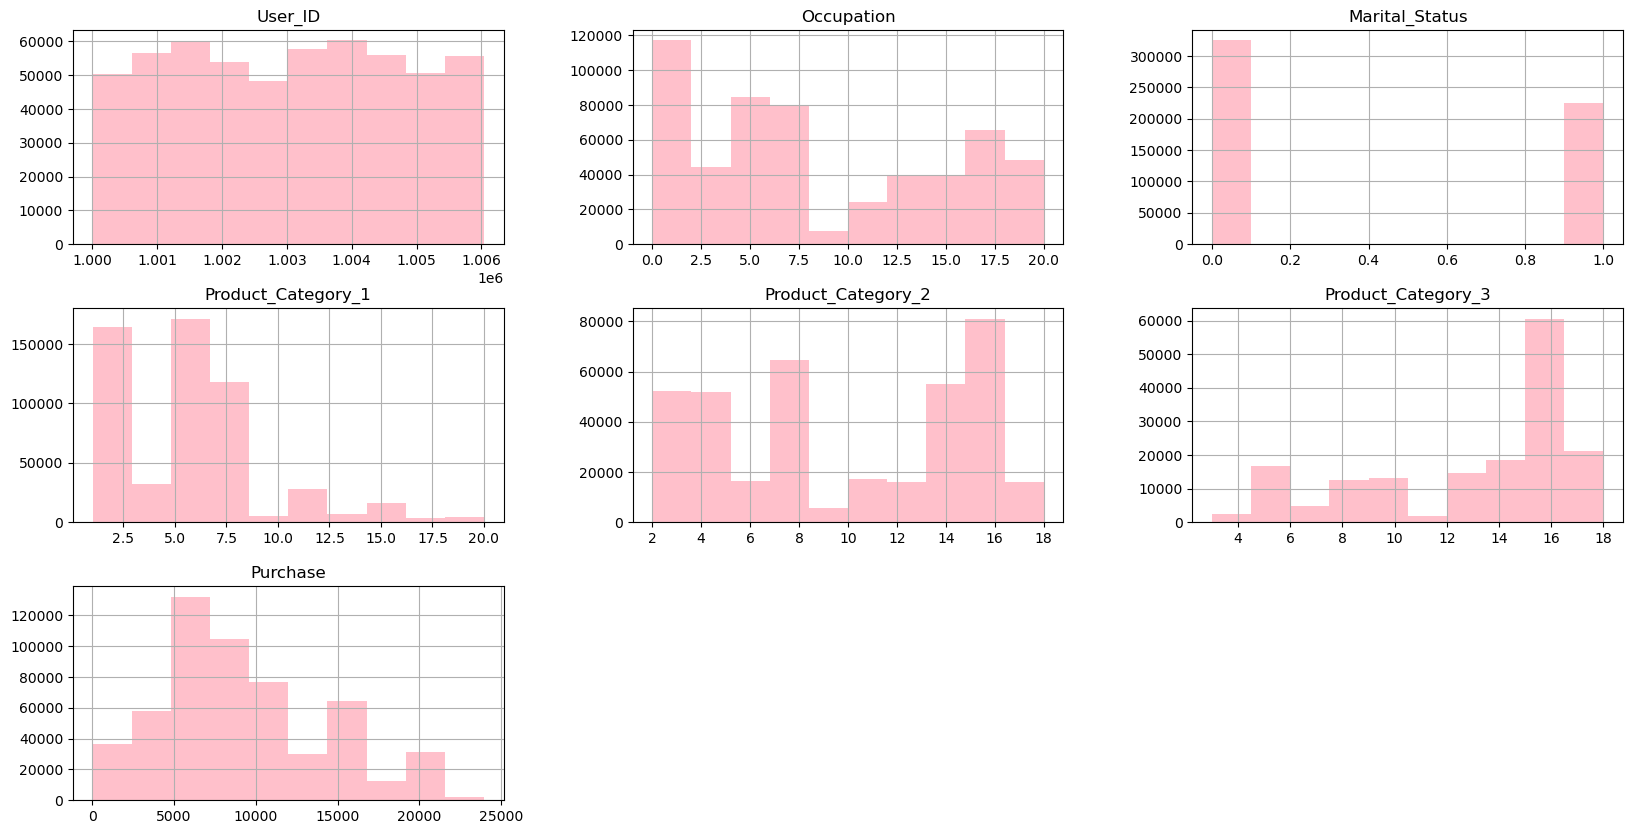

In [8]:
train_data.hist(color='pink', figsize=(20,10))
plt.show()

There are noticable variances amongst the features, these would help explain the variation of the purchase amount in the dataset.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

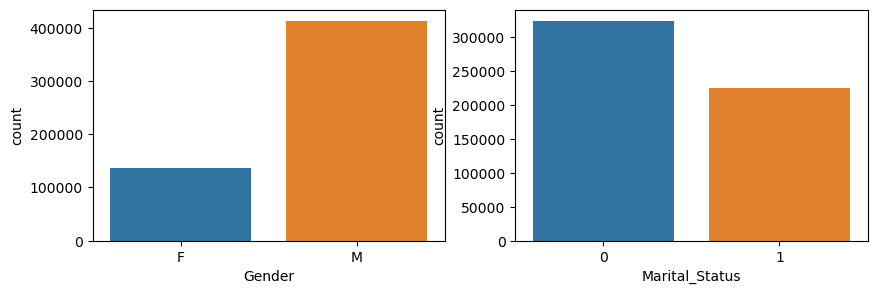

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(x='Gender',data=train_data,ax=ax[0])
sns.countplot(x='Marital_Status',data=train_data,ax=ax[1])

- There is variation in gender for us to take into account towards variability of purchase amount, and there is some variation in marital status as well

Text(0.5, 1.0, 'Gender vs Marital Status Purchase Distribution')

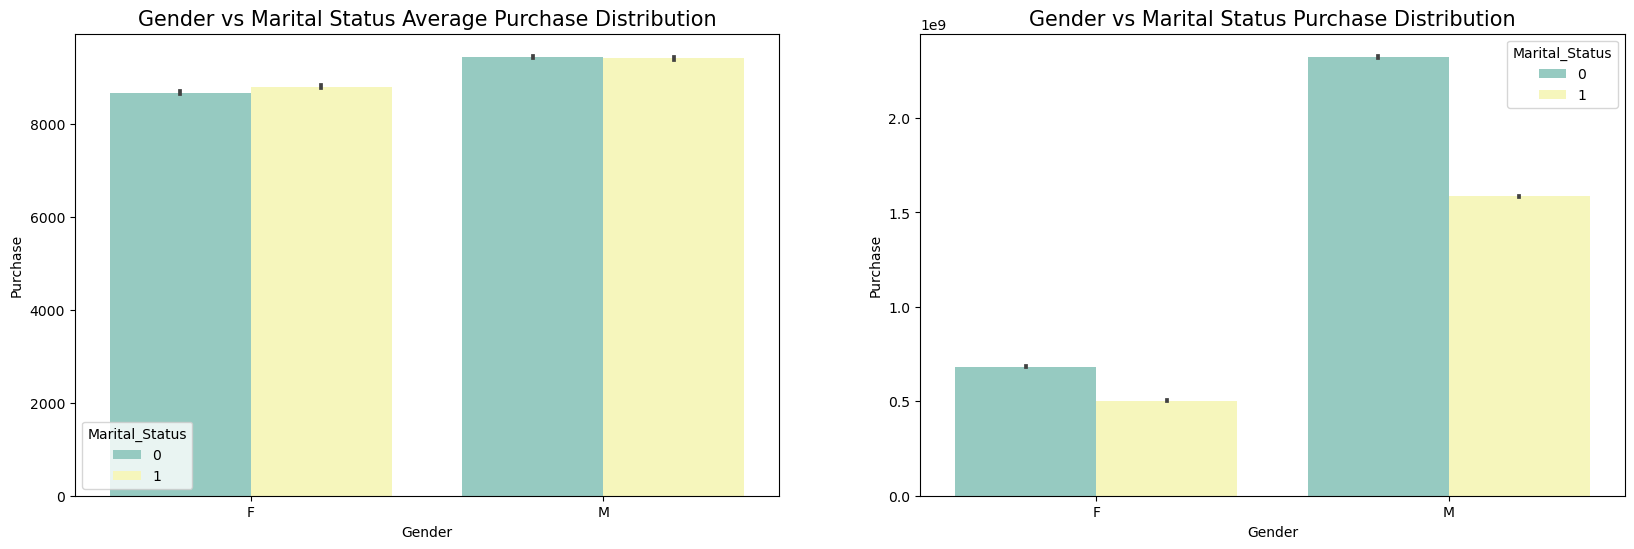

In [10]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.barplot(x='Gender',y='Purchase', hue='Marital_Status', 
            data=train_data, estimator=np.mean, ax=ax[0],
            palette='Set3').set_title('Gender vs Marital Status Average Purchase Distribution', size=15)

sns.barplot(x='Gender',y='Purchase', hue='Marital_Status', 
            data=train_data, estimator=np.sum, ax=ax[1],
            palette='Set3').set_title('Gender vs Marital Status Purchase Distribution',size=15)


- There are alot more males who shop versus females, surprisingly
- Single men have slightly higher average purchase value, while married females have a higher average purchase value.
- hypothesis #1: single (more)/married guys save up to buy expensive things (tech) on black friday

[Text(0, 0, '147720'), Text(0, 0, '171175'), Text(0, 0, '231173')]

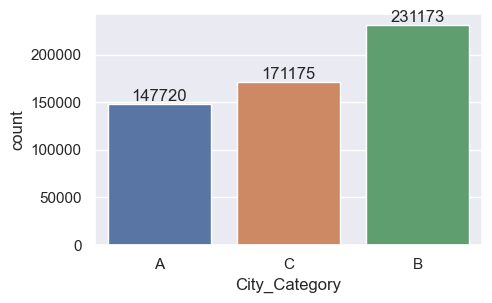

In [11]:
sns.set(rc={'figure.figsize':(5,3)})
ax=sns.countplot(x='City_Category',data=train_data)
ax.bar_label(ax.containers[0])

[Text(0, 0, '101838'),
 Text(0, 0, '84726'),
 Text(0, 0, '95285'),
 Text(0, 0, '193821'),
 Text(0, 0, '74398')]

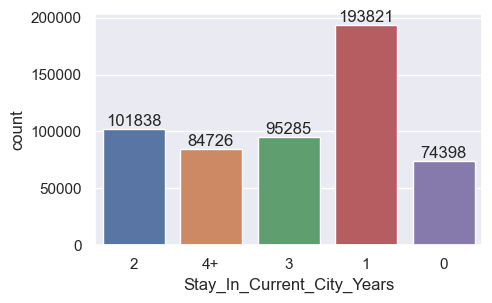

In [12]:
sns.set(rc={'figure.figsize':(5,3)})
ax=sns.countplot(x='Stay_In_Current_City_Years',data=train_data)
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'City cat vs years in city purchase distribution')

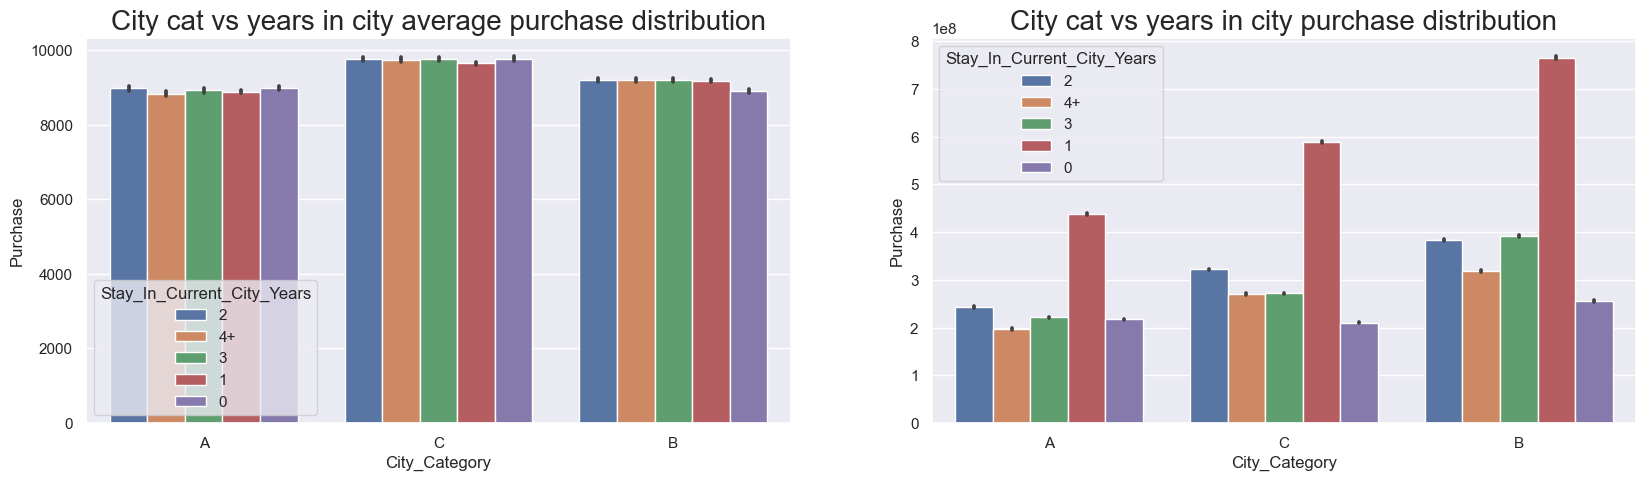

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='City_Category',y='Purchase',estimator=np.mean,data=train_data,hue='Stay_In_Current_City_Years',ax=ax[0]).set_title('City cat vs years in city average purchase distribution',size=20)
sns.barplot(x='City_Category',y='Purchase',estimator=np.sum,data=train_data,hue='Stay_In_Current_City_Years',ax=ax[1]).set_title('City cat vs years in city purchase distribution',size=20)

- there is variation in average purchase value across years lived in city with 
- Even if city B had the most purchases, city C had the highest average purchase value 
- people stay for 1 year the most

Text(0.5, 1.0, 'Age vs Average Purchase Distribution')

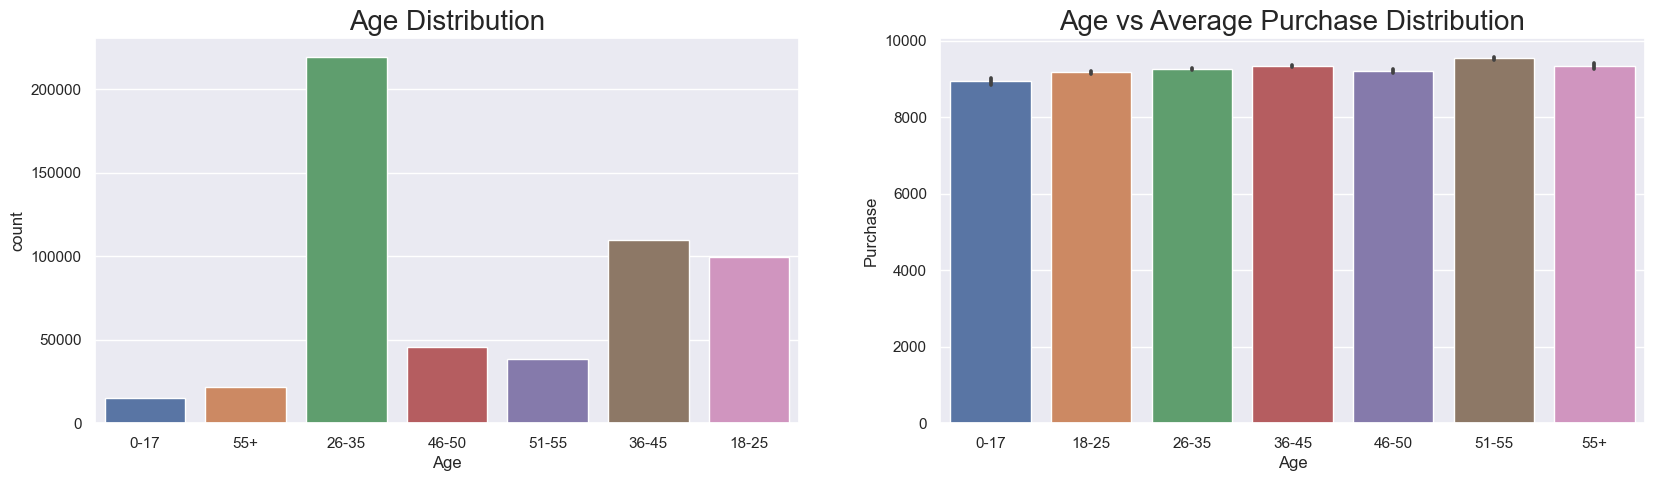

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Age',data=train_data,ax=ax[0]).set_title('Age Distribution',size=20)

#Age = train_data['Age'].value_counts()
sns.barplot(x='Age',y='Purchase',data=train_data,ax=ax[1],estimator=np.mean,
            order=['0-17','18-25','26-35','36-45','46-50','51-55','55+']).set_title('Age vs Average Purchase Distribution',size=20)


- 26-35 made the most purchase
- Age vs Average purchase has a positive upwards trend

In [15]:
#Get percentages of each occupation
Occupation_percent =train_data.groupby('Occupation').Purchase.agg(['sum'])
Occupation_percent=Occupation_percent.apply(lambda x: 100 * x / float(x.sum())).reset_index()
Occupation_percent=Occupation_percent.sort_values(by=['sum'],ascending=False)

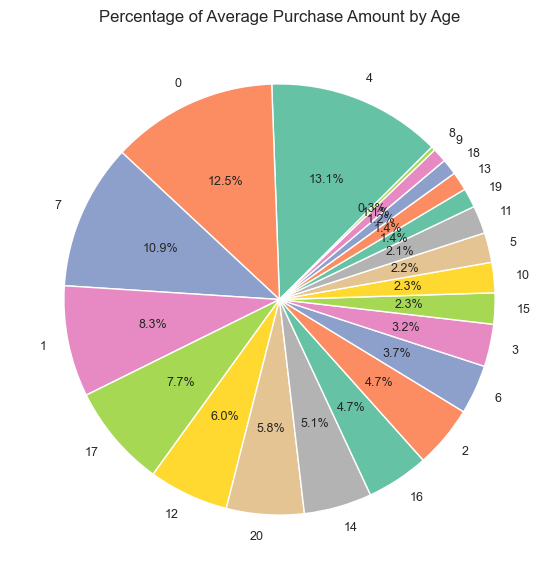

In [16]:
plt.figure(figsize=(7,7))
plt.pie(Occupation_percent['sum'],labels=Occupation_percent['Occupation'], 
        autopct='%1.1f%%', textprops={'fontsize': 9}, counterclock=True,startangle=45, 
        colors = sns.color_palette('Set2'))
plt.title('Percentage of Average Purchase Amount by Age')
plt.show()

- 50% of sales were attributed to top 5 Occupations: 4,0,7,1,17

Text(0.5, 1.0, 'Occupation vs Average Purchase Distribution')

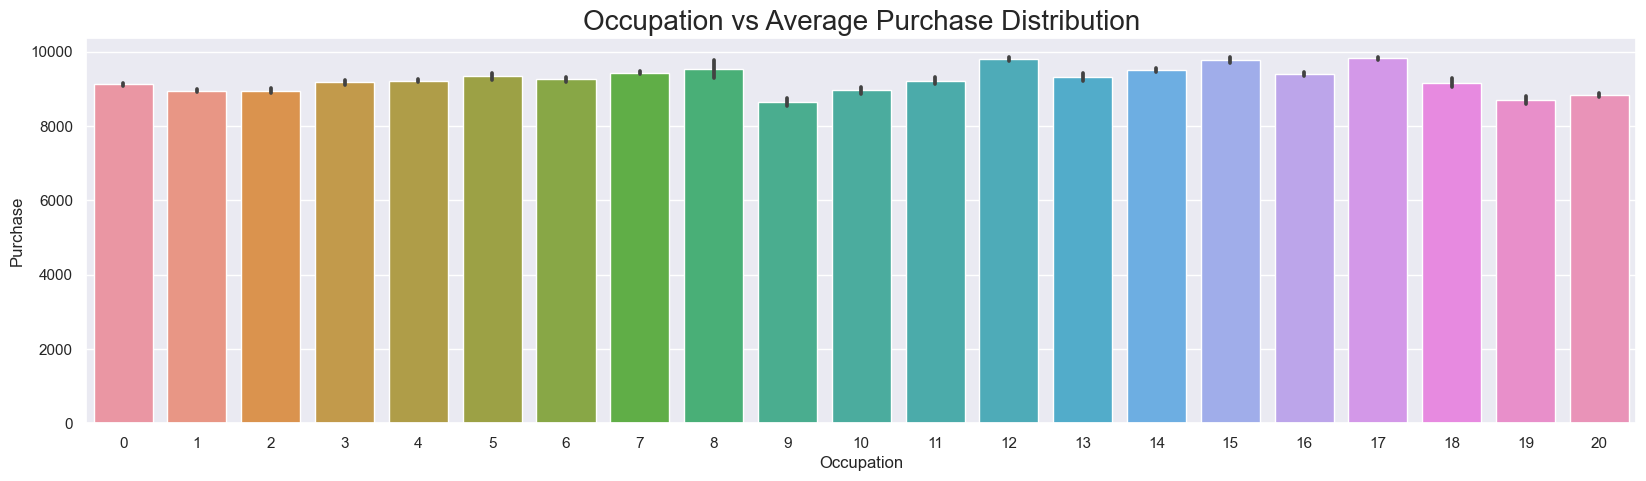

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

sns.barplot(x='Occupation',y='Purchase',
            data=train_data,estimator=np.mean).set_title('Occupation vs Average Purchase Distribution',size=20)


- There is variation in average purchase by occupation, it might help to explain the purchase variability

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Text(0.5, 1.0, 'Product 1 vs Purchase Distribution')

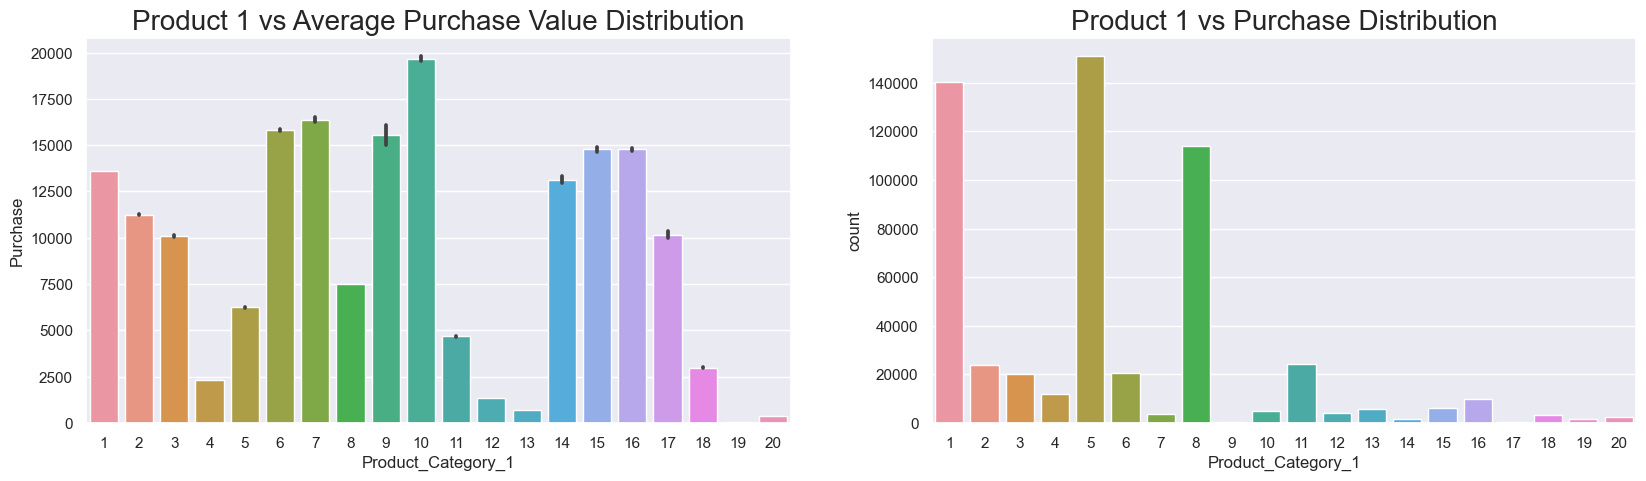

In [19]:
#Product 1
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.barplot(x='Product_Category_1',y='Purchase',estimator=np.mean,data=train_data,ax=ax[0]).set_title('Product 1 vs Average Purchase Value Distribution',size=20)
sns.countplot(x='Product_Category_1',data=train_data,ax=ax[1]).set_title('Product 1 vs Purchase Distribution',size=20)

- 6,7,9,10 products have the highest purchase values
- but product 1,5,8 have been bought the most out of product category 1

Text(0.5, 1.0, 'Product 2 vs Purchase Distribution')

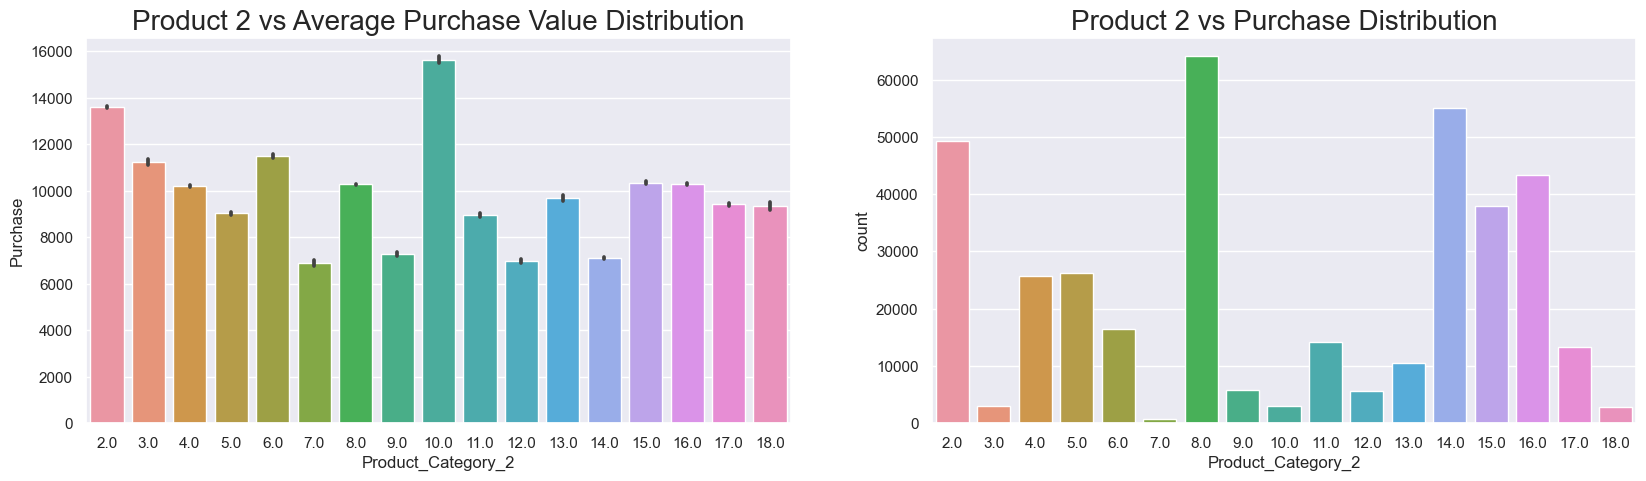

In [20]:
#Product 2
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.barplot(x='Product_Category_2',y='Purchase',estimator=np.mean,data=train_data,ax=ax[0]).set_title('Product 2 vs Average Purchase Value Distribution',size=20)
sns.countplot(x='Product_Category_2',data=train_data,ax=ax[1]).set_title('Product 2 vs Purchase Distribution',size=20)

- product 10 has highest purchase value
- product 8 had been bought the most

Text(0.5, 1.0, 'Product 3 vs Purchase Distribution')

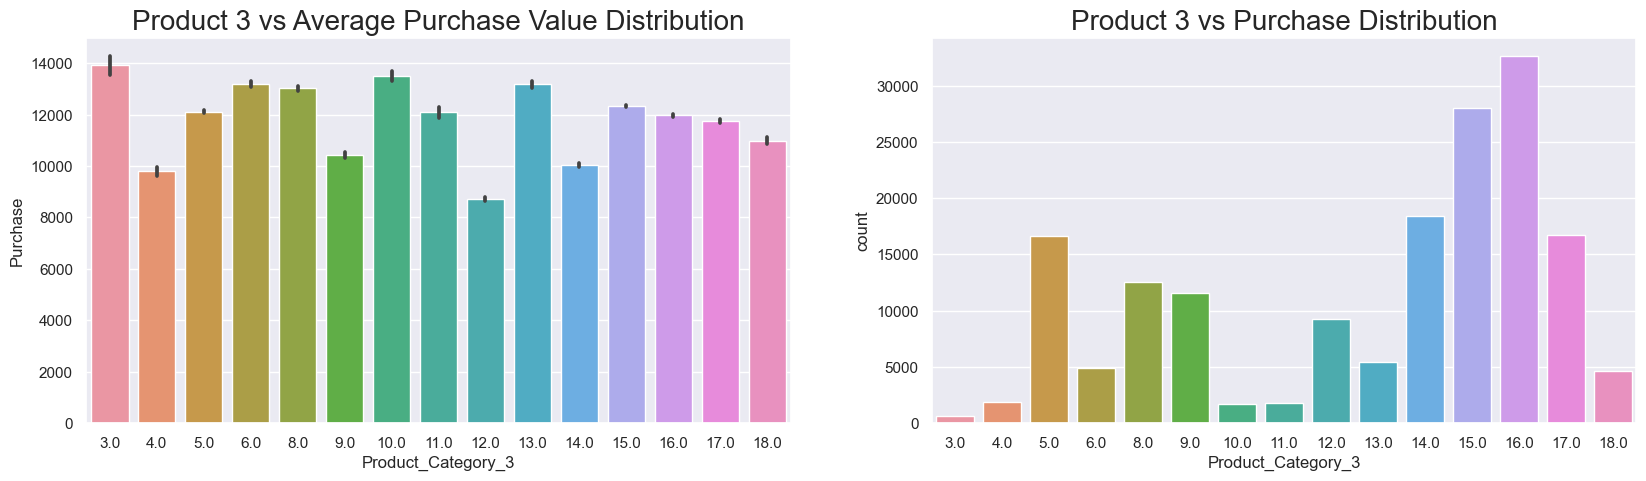

In [21]:
#Product 3
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.barplot(x='Product_Category_3',y='Purchase',estimator=np.mean,data=train_data,ax=ax[0]).set_title('Product 3 vs Average Purchase Value Distribution',size=20)
sns.countplot(x='Product_Category_3',data=train_data,ax=ax[1]).set_title('Product 3 vs Purchase Distribution',size=20)

- many products have high purchase value, but there is alot of missing data for product 3
- product 16 was bought the most

In [22]:
train_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

C:\Users\kami.cheung\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

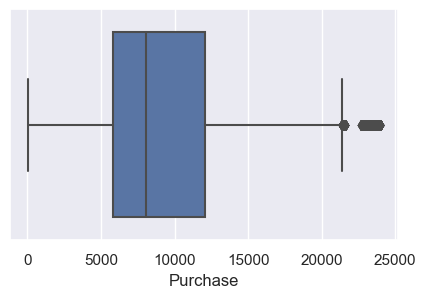

In [23]:
sns.boxplot(train_data['Purchase'])

- 50% of customers bought items valued between 5100 to 1300 on black friday, indicating that people tend to have a high threshold of spend on black friday

# Data Processing (Encoding, FE, FS)

In [24]:
submission = test[['User_ID','Product_ID']]

In [25]:
train = train_data.sample(frac=0.999,random_state=0)
dev = train_data.drop(train.index)
dev

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1337,1000216,P00088542,M,46-50,13,B,1,0,5,12.0,14.0,7169
1913,1000306,P00350342,M,18-25,0,C,3,0,1,6.0,NaN,15864
3466,1000552,P00185542,M,51-55,18,C,3,1,4,5.0,NaN,2749
3912,1000646,P00299542,M,36-45,7,C,2,0,8,NaN,NaN,7989
5028,1000822,P00004842,F,26-35,1,B,0,1,3,4.0,12.0,10955
...,...,...,...,...,...,...,...,...,...,...,...,...
541377,1005365,P00074042,M,18-25,12,C,0,0,16,NaN,NaN,12871
545277,1005949,P00263442,M,18-25,17,B,3,1,16,NaN,NaN,4354
547705,1002642,P00370293,M,26-35,0,C,0,0,19,NaN,NaN,24
548692,1004083,P00372445,M,55+,14,A,0,0,20,NaN,NaN,244


In [26]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
41001,1000306,P00093542,M,18-25,0,C,3,0,1,6.0,NaN,15228
16151,1002478,P0097142,M,51-55,1,A,0,0,12,NaN,NaN,1088
507262,1000129,P00129842,M,26-35,11,C,2,0,6,8.0,15.0,16426
368698,1002816,P00025442,M,26-35,7,C,4+,1,1,2.0,9.0,12042
353782,1000514,P00220442,M,26-35,2,A,1,1,5,14.0,NaN,8699
...,...,...,...,...,...,...,...,...,...,...,...,...
406134,1002496,P00293742,M,51-55,1,B,1,0,8,NaN,NaN,6013
465579,1005716,P00029242,M,0-17,10,C,4+,0,8,NaN,NaN,6179
460820,1004942,P00051642,M,46-50,12,B,3,1,8,NaN,NaN,8126
375026,1003729,P00295742,M,18-25,4,A,2,0,8,NaN,NaN,6078


In [27]:
train.Stay_In_Current_City_Years.unique()

array(['3', '0', '2', '4+', '1'], dtype=object)

- we convert categorical data to numeric, for lightgbm to handle internally

In [28]:
train['Age']=train['Age'].replace(['18-25', '51-55', '26-35', '36-45', '46-50', '55+', '0-17'],[21,53,30,25,48,60,12])
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace(['4+'],5)

dev['Age']=train['Age'].replace(['18-25', '51-55', '26-35', '36-45', '46-50', '55+', '0-17'],[21,53,30,25,48,60,12])
dev['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace(['4+'],5)

test['Age']=train['Age'].replace(['18-25', '51-55', '26-35', '36-45', '46-50', '55+', '0-17'],[21,53,30,25,48,60,12])
test['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace(['4+'],5)

Change cat data in age and stay in currenty city to numerical data

In [29]:
train.City_Category.unique()

array(['C', 'A', 'B'], dtype=object)

In [30]:
train['Gender']=train['Gender'].replace(['M','F'],[1,0])
train['City_Category']=train['City_Category'].replace(['A','B','C'],[1,2,3])

dev['Gender']=train['Gender'].replace(['M','F'],[1,0])
dev['City_Category']=train['City_Category'].replace(['A','B','C'],[1,2,3])


test['Gender']=train['Gender'].replace(['M','F'],[1,0])
test['City_Category']=train['City_Category'].replace(['A','B','C'],[1,2,3])

In [31]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173466
Product_Category_3            382863
Purchase                           0
dtype: int64

In [32]:
train=train.fillna(0)
dev=dev.fillna(0)
test=test.fillna(0)

In [33]:
train.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [34]:
#Because we have to drop User and Product ID, we create new features that resemble them to retain data
train['Buying_Power']=train.groupby('User_ID')['Purchase'].transform(np.mean)
train['Average_Cost']=train.groupby('Product_ID')['Purchase'].transform(np.mean)

In [35]:
#We then want to impute global averages into dev and test set if there are new users

user_buying_power=train[['Buying_Power','User_ID']].drop_duplicates()
global_buying_power=user_buying_power['Buying_Power'].mean()
print('Global Average Buying Power from train:',global_buying_power)#train['Buying_Power'].drop_duplicates().mean())

product_price=train[['Average_Cost','Product_ID']].drop_duplicates()
global_average_cost=product_price['Average_Cost'].mean()
#train['Average_Cost'].drop_duplicates().mean()
print('Global Average Cost from train:', global_average_cost)

Global Average Buying Power from train: 9568.92548706315
Global Average Cost from train: 7874.904788143822


In [36]:
user_buying_power

,Buying_Power,User_ID
41001,10409.794643,1000306
16151,9201.847134,1002478
507262,14755.070588,1000129
368698,14669.666667,1002816
353782,11329.203704,1000514
...,...,...
65000,8754.900000,1003969
4274,9770.833333,1000708
415168,5483.222222,1003883
211717,12541.285714,1002690


In [37]:
product_price

,Average_Cost,Product_ID
41001,11619.263158,P00093542
16151,1378.356557,P0097142
507262,15359.501678,P00129842
368698,17334.468111,P00025442
353782,7249.285937,P00220442
...,...,...
514546,18468.000000,P00315142
130944,7181.000000,P00231642
488942,4776.000000,P00132742
354280,5175.000000,P00056342


- We merge these averages with the dev and test sets using the primary keys

In [38]:
dev=dev.merge(user_buying_power,on='User_ID',how='left')
dev=dev.merge(product_price,on='Product_ID',how='left')
dev

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Buying_Power,Average_Cost
0,1000216,P00088542,0.0,0.0,13,0.0,0,0,5,12.0,14.0,7169,7309.193925,7205.452055
1,1000306,P00350342,0.0,0.0,0,0.0,0,0,1,6.0,0.0,15864,10409.794643,12638.231707
2,1000552,P00185542,0.0,0.0,18,0.0,0,1,4,5.0,0.0,2749,10694.015873,2074.032258
3,1000646,P00299542,0.0,0.0,7,0.0,0,0,8,0.0,0.0,7989,12190.000000,6582.867925
4,1000822,P00004842,0.0,0.0,1,0.0,0,1,3,4.0,12.0,10955,7666.178571,8042.253589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1005365,P00074042,0.0,0.0,12,0.0,0,0,16,0.0,0.0,12871,9874.299401,10682.797468
546,1005949,P00263442,0.0,0.0,17,0.0,0,1,16,0.0,0.0,4354,9106.923810,12086.431818
547,1002642,P00370293,0.0,0.0,0,0.0,0,0,19,0.0,0.0,24,11425.166667,36.691327
548,1004083,P00372445,0.0,0.0,14,0.0,0,0,20,0.0,0.0,244,8117.020979,375.087321


In [39]:
test=test.merge(user_buying_power,on='User_ID',how='left')
test=test.merge(product_price,on='Product_ID',how='left')
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Buying_Power,Average_Cost
0,1000004,P00128942,0.0,12.0,7,1.0,2,1,1,11.0,0.0,14747.714286,15785.583957
1,1000009,P00113442,0.0,12.0,17,1.0,2,0,3,5.0,0.0,10243.086207,11746.665354
2,1000010,P00288442,0.0,12.0,1,1.0,2,1,5,14.0,0.0,9728.744395,5731.338028
3,1000010,P00145342,0.0,12.0,1,1.0,2,1,4,9.0,0.0,9728.744395,1943.266667
4,1000011,P00053842,1.0,60.0,1,3.0,5,0,4,5.0,12.0,7957.471429,2585.590829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,1.0,53.0,15,1.0,1,1,8,0.0,0.0,8008.291585,8254.105960
233595,1006036,P00254642,1.0,30.0,15,2.0,2,1,5,8.0,0.0,8008.291585,6550.075342
233596,1006036,P00031842,1.0,30.0,15,2.0,2,1,1,5.0,12.0,8008.291585,10346.816754
233597,1006037,P00124742,1.0,30.0,1,2.0,2,0,10,16.0,0.0,9176.540984,18139.306931


In [40]:
test.isna().sum()

User_ID                        0
Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3             0
Buying_Power                   0
Average_Cost                  61
dtype: int64

In [41]:
#now we fill the dev and test sets with global averages from our new features

dev['Buying_Power']=dev['Buying_Power'].fillna(global_buying_power)
dev['Average_Cost']=dev['Average_Cost'].fillna(global_average_cost)
test['Buying_Power']=test['Buying_Power'].fillna(global_buying_power)
test['Average_Cost']=test['Average_Cost'].fillna(global_average_cost)

print(dev.isna().sum())
print()
print(test.isna().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Buying_Power                  0
Average_Cost                  0
dtype: int64

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Buying_Power                  0
Average_Cost                  0
dtype: int64


Now we extract the categorical features, for lightgbm

In [42]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Buying_Power',
       'Average_Cost'],
      dtype='object')

In [43]:
categorical_columns = ['Gender', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 
                       'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']

In [44]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Buying_Power,Average_Cost
41001,1000306,P00093542,1,21,0,3,3,0,1,6.0,0.0,15228,10409.794643,11619.263158
16151,1002478,P0097142,1,53,1,1,0,0,12,0.0,0.0,1088,9201.847134,1378.356557
507262,1000129,P00129842,1,30,11,3,2,0,6,8.0,15.0,16426,14755.070588,15359.501678
368698,1002816,P00025442,1,30,7,3,5,1,1,2.0,9.0,12042,14669.666667,17334.468111
353782,1000514,P00220442,1,30,2,1,1,1,5,14.0,0.0,8699,11329.203704,7249.285937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406134,1002496,P00293742,1,53,1,2,1,0,8,0.0,0.0,6013,7404.435811,7873.151832
465579,1005716,P00029242,1,12,10,3,5,0,8,0.0,0.0,6179,10682.672269,7456.932065
460820,1004942,P00051642,1,48,12,2,3,1,8,0.0,0.0,8126,9359.118750,7871.123786
375026,1003729,P00295742,1,21,4,1,2,0,8,0.0,0.0,6078,9661.706827,6464.591440


Drop User_ID and Product_ID columns as we don't need them for model

In [45]:
train = train.drop(columns =['User_ID','Product_ID'])
dev = dev.drop(columns =['User_ID','Product_ID'])
test = test.drop(columns =['User_ID','Product_ID'])

- one hot encode for model selection phase

In [46]:
#train=pd.get_dummies(train,columns=categorical_columns)
#dev=pd.get_dummies(dev,columns=categorical_columns)
#test=pd.get_dummies(test,columns=categorical_columns)

In [47]:
#print(train.shape)
#print(dev.shape)
#print(test.shape)

Splitting the data for model

In [48]:
X_train = train.iloc[:,:-1].values
X_dev = dev.iloc[:,:-1].values
y_train = train.iloc[:,-1].values
y_actual = dev.iloc[:,-1].values

X_test = test.iloc[:,:].values

Scaling the data so ranges are equivalent, for model to process optimally

In [49]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_dev)
scaler.fit_transform(X_test)

array([[-1.74453259, -1.69567645, -0.16644456, ..., -0.61578869,
         3.40287075,  1.52744963],
       [-1.74453259, -1.69567645,  1.36703141, ..., -0.61578869,
         0.61233124,  0.56933496],
       [-1.74453259, -1.69567645, -1.08653014, ..., -0.61578869,
         0.29370535, -0.85762455],
       ...,
       [ 0.57321944, -0.10035277,  1.06033621, ...,  1.3021796 ,
        -0.77208554,  0.23726205],
       [ 0.57321944, -0.10035277, -1.08653014, ..., -0.61578869,
        -0.04837516,  2.08580119],
       [ 0.57321944, -0.10035277, -1.23987774, ..., -0.61578869,
        -0.77010222, -1.56846656]])

# Model Selection, Hypertuning

In [50]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

rmse_score = make_scorer(rmse, greater_is_better=False)

In [51]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_dev)

rmse(y_pred,y_actual)

2328.962558755302

In [52]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_dev)

rmse(y_pred,y_actual)

1864.6881416364108

In [53]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_dev)

rmse(y_pred,y_actual)

1203.0850468533743

In [54]:
model = LGBMRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_dev)

rmse(y_pred,y_actual)

1166.7281783971234

In [55]:
model.score(X_dev,y_actual)

0.9214730424718174

LGBM is the best model, let's tune this futher to optimize performance

In [56]:
#Initialize model with some parameters, 500 trees, 200 iterations, lr is a list of values
lgb = LGBMRegressor(metric = 'rmse', categorical_columns = categorical_columns,subsample = 0.5, num_leaves = 500, num_iterations =200,  random_state=0 )
param_test ={'learning_rate' : [0.05,0.1,0.2,0.3]}

In [57]:
#GridSearch over 100 iterations
Total_sets = 100

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=Total_sets,
    scoring=rmse_score,
    cv=4,
    refit=True,
    random_state=314,
    n_jobs = 4,
    verbose=True)
gs.fit(X_train, y_train)

print('Best score reached: {} with params: {} '.format(-1*gs.best_score_, gs.best_params_))

y_pred  = gs.predict(X_dev)
score =  rmse(y_pred,y_actual)
y_test = gs.predict(X_test)

print('r2 score:',r2_score(y_actual, y_pred))

submission['Purchase'] = pd.DataFrame(y_test) 
submission.to_csv("./submission_jupyter.csv")

C:\Users\kami.cheung\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 4 folds for each of 4 candidates, totalling 16 fits


C:\Users\kami.cheung\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: categorical_columns
Best score reached: 1070.6554319667512 with params: {'learning_rate': 0.1} 
r2 score: 0.9241204665155963


In [58]:
#Model performance example with train data
lgb = LGBMRegressor(metric = 'rmse', categorical_columns = categorical_columns,subsample = 0.5, 
                    num_leaves = 500, num_iterations =200,  random_state=0, learning_rate=0.1)
lgb.fit(X_train, y_train)
y_predicted = lgb.predict(X_train)
y_predicted

C:\Users\kami.cheung\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: categorical_columns


array([12309.64884886,  1524.39525806, 14376.91726638, ...,
        7798.32395142,  7295.69329228, 12476.84373994])

In [59]:
r2 = r2_score(y_train, y_predicted)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9499259695555513


In [60]:
train=train.drop(columns='Purchase')

Plotting the feature importance. As expected, Average Cost and Buying Power are the features with highest importance. As seen in the visualization- City, Stay in city, Marital Status, Gender did not have a lot of variance which led to a lower effect on Purchase Amount. Occupation and Product Categories also had significant effect on Purchase amount.

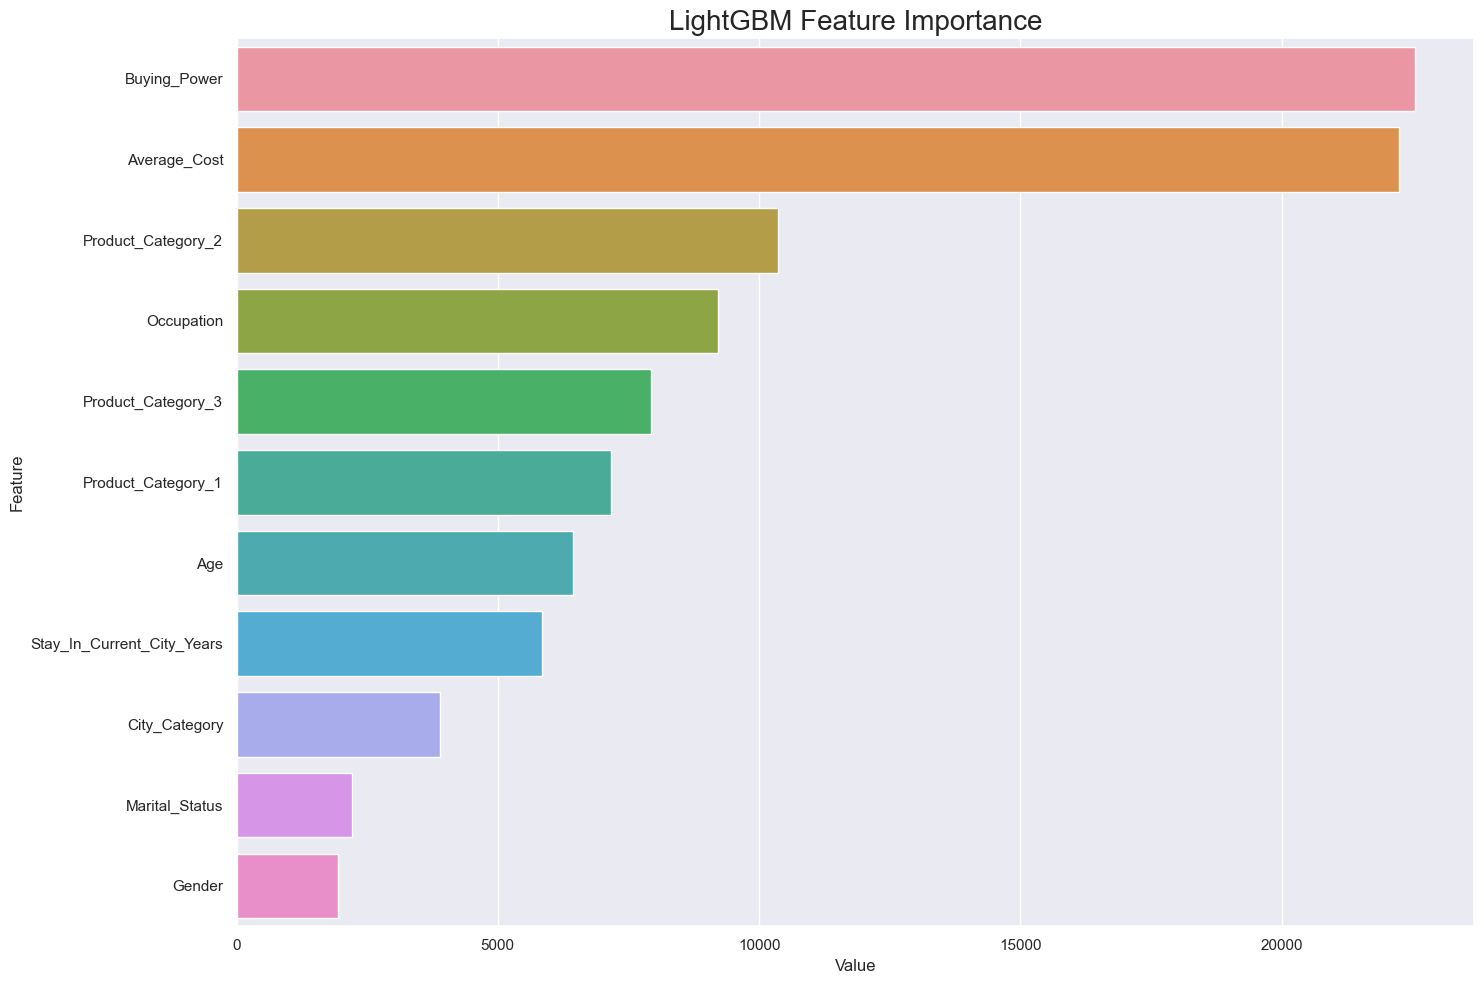

In [61]:
sorted(zip(lgb.feature_importances_, train.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_,train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(label= 'LightGBM Feature Importance', size = 20)
plt.tight_layout()
plt.show()

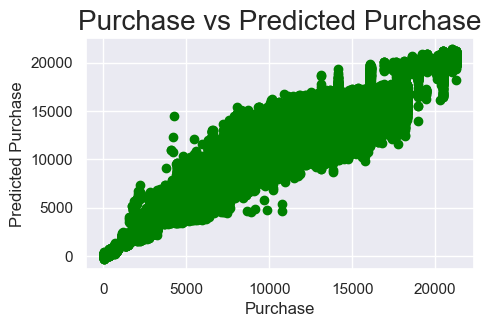

In [62]:
plt.scatter(y_train, y_predicted, c = 'green')
plt.xlabel("Purchase")
plt.ylabel("Predicted Purchase")
plt.title(label = "Purchase vs Predicted Purchase", size = 20)
plt.show()

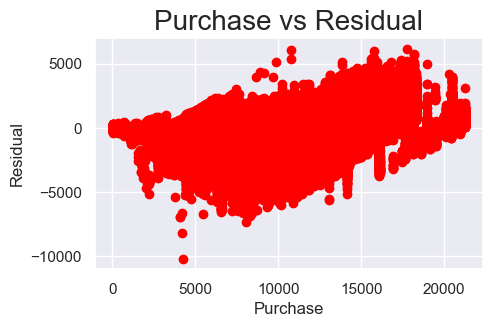

In [63]:
plt.scatter(y_train, y_train -y_predicted, c = 'red')
plt.xlabel("Purchase")
plt.ylabel("Residual")
plt.title(label = "Purchase vs Residual", size = 20)
plt.show()